# Image Classification using Convolutional Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os 
import torch 
import torchvision 
import tarfile

from torchvision.datasets import CIFAR10
from torch.utils import data

import torch.nn as nn
import torch.nn.functional as F

In [2]:
dataset_url = "http://files.fast.ai/data/cifar10.tgz"
torchvision.datasets.utils.download_url(url=dataset_url, root='~/Developer/GITHUB/DATA')

Using downloaded and verified file: /Users/shriharimuttagi/Developer/GITHUB/DATA/cifar10.tgz


In [3]:
# Extract from archive 
if os.path.isdir('/Users/shriharimuttagi/Developer/GITHUB/DATA/cifar10')==False:
    with tarfile.open('/Users/shriharimuttagi/Developer/GITHUB/DATA/cifar10.tgz') as tar:
        tar.extractall(path = '/Users/shriharimuttagi/Developer/GITHUB/DATA')

In [4]:
paths = '/Users/shriharimuttagi/Developer/GITHUB/DATA/cifar10'
print(os.listdir(paths))

classes = os.listdir(paths+'/train')
print(classes)

print('Images per label =',len(os.listdir(paths+'/train/bird')))

['test', 'labels.txt', 'train']
['cat', 'dog', 'truck', 'bird', 'airplane', 'ship', 'frog', 'horse', 'deer', 'automobile']
Images per label = 5000


# Batching the Data

#### Image is RGB (3,x,x)

In [5]:
dataset = torchvision.datasets.ImageFolder(paths+'/train', transform=torchvision.transforms.ToTensor())

print('Total images in Training = ',len(dataset))

img, label = dataset[2]
print('Image shape = {} and Label of image = {}'.format(img.shape, label))

# labeled data
print('labels are = ', dataset.classes)

Total images in Training =  50000
Image shape = torch.Size([3, 32, 32]) and Label of image = 0
labels are =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


#### Initilize the Batch Data & create Validation set
Validation set = 5000
training data = 4500

In [6]:
batch_size = 64
val = 5000
train_size = len(dataset)-val

torch.manual_seed(34)

In [7]:
train_set, val_set = torch.utils.data.random_split(dataset, [train_size, val])

print('Training set = {} and Validation Set = {}'.format(len(train_set), len(val_set)))

Training set = 45000 and Validation Set = 5000


#### Randomize Training and validation data

In [8]:
train_set = data.dataloader.DataLoader(train_set,batch_size=batch_size, 
                                       shuffle=True, num_workers=4, pin_memory=True)
val_data = data.dataloader.DataLoader(val_set, batch_size=batch_size*2, num_workers=4, pin_memory=True)

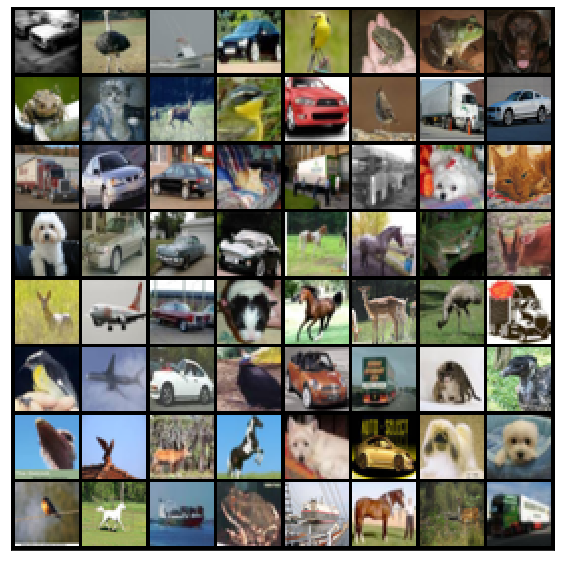

In [9]:
# matplotlib works as (img.hight, img.wight, channels)
# therefore we have to convert (3,x,x) to --> (x,x,3)

def show_batch(batch_imgs):
    for img, label in batch_imgs:
        fig, ax = plt.subplots(figsize = (10,10))
        ax.imshow(torchvision.utils.make_grid(img, nrow=8).permute(1,2,0))
        ax.set_xticks([]), ax.set_yticks([])
        break

show_batch(train_set)

# Define MODEL

INPUT IMAGE ==> CONV LAYER ==> POOLING LAYER ==> CONV LAYER ==> POOLING LAYER ==> FULLY CONNECTED LAYER

In [ ]:
# Define HELPER methods

def accuracy(output, label):
    _, pred = torch.max(output, dim=1)
    return torch.tensor(torch.sum(pred == label).item()/len(pred))